In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special 
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [13]:
# Verificar sin indice 
df= pd.read_csv('Datos_Limpios_Athenas_NNNA.csv')
df.head(5)

,Unnamed: 0,id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,last_scraped,source,host_response_time,host_is_superhost,host_verifications,neighbourhood,property_type,room_type,amenities,license
0,0,27262,37177,100.0,100.0,4.0,12.0,37.98924,23.70000,2.0,...,2024-12-25,city scrape,within an hour,t,"['email', 'phone']",Dato desconocido,Entire rental unit,Entire home/apt,"[""Heating - split type ductless system"", ""Dish...",00002433111
1,1,809874,4259738,100.0,96.0,2.0,2.0,37.96215,23.72179,4.0,...,2024-12-25,city scrape,within an hour,f,"['email', 'phone']",Dato desconocido,Entire rental unit,Entire home/apt,"[""Host greets you"", ""Dishes and silverware"", ""...",00001240742
2,2,866381,4551671,100.0,97.0,1.0,1.0,38.00000,23.72443,3.0,...,2024-12-25,city scrape,within a few hours,t,"['email', 'phone', 'work_email']",Dato desconocido,Entire condo,Entire home/apt,"[""Coffee"", ""Dishes and silverware"", ""Washer"", ...",00002608390
3,3,886724,4700824,100.0,99.6,1.0,1.0,37.99745,23.73973,2.0,...,2024-12-25,city scrape,Dato desconocido,f,['email'],"Athens, Attica, Greece",Entire rental unit,Entire home/apt,"[""Host greets you"", ""Luggage dropoff allowed"",...",00000052101
4,4,896212,4777984,100.0,100.0,29.0,50.0,37.98844,23.73845,2.0,...,2024-12-25,city scrape,within an hour,t,"['email', 'phone']","Athens, Attica, Greece",Entire rental unit,Entire home/apt,"[""Host greets you"", ""Coffee"", ""Dishes and silv...",00000206136


## Modelado de cada variable 

### host_response_rate

**Modelo1 cuadrática**

In [14]:
#Declaramos las variables dependientes e independietes para la regresión NO lineal
var_indep=df[['reviews_per_month']]
var_dep=df['host_response_rate']

#Redefinicmos las variables
x= var_indep
y= var_dep


#Generamos una función para el modelo mátematico 
def func1 (x, a, b, c):
    return a*x**2 + b*x +c


#Ajsutamos los parametros de la cunción curve_fit
parametros1, covs = curve_fit(func1, df['reviews_per_month'], df['host_response_rate'])

print(parametros1)

#Predicciones
y_pred1 = func1(x, *parametros1)


[ 7.97781747e-09 -5.88231041e-08  1.00000000e+02]


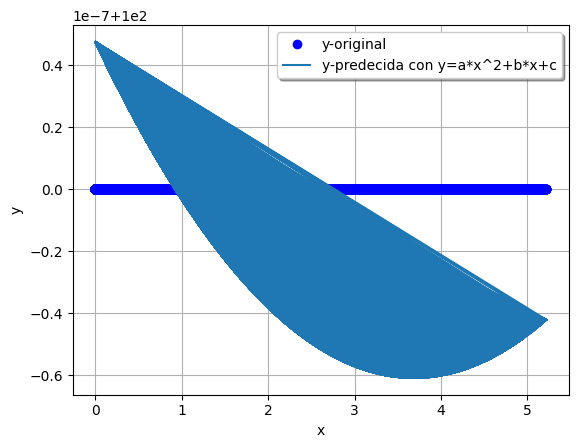

In [15]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred1, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [16]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred1) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

0.0
0.0


**Modelo 2 función senoidal**

In [17]:
def func2(x, a, b):
    return a*np.sin(x) + b

#Ajsutamos los parametros de la cunción curve_fit
parametros2, covs = curve_fit(func2, df['reviews_per_month'], df['host_response_rate'])
print(parametros2)

# Predicciones
y_pred2 = func2(x, *parametros2)

[-6.50344024e-08  1.00000000e+02]


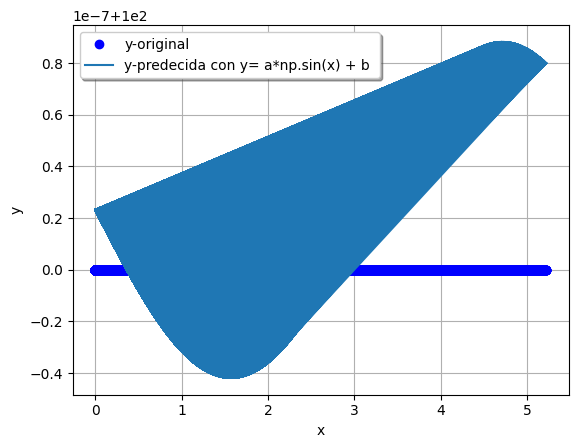

In [18]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred2, label="y-predecida con y= a*np.sin(x) + b ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [19]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo2 = r2_score(y, y_pred2) 
print('el coeficiente de determinación es: ', R2_Modelo2)

#Calculamos el coeficiente de correlación del modelo
R2= np.sqrt(R2_Modelo2)
print('el coeficiente de correlación es: ',R2)

el coeficiente de determinación es:  0.0
el coeficiente de correlación es:  0.0


### host_acceptance_rate

**Modelo 1 Cuadrática**

In [20]:
#Declaramos las variables dependientes e independietes para la regresión NO lineal
var_indep2=df[['host_total_listings_count']]
var_dep2=df['host_acceptance_rate']

#Redefinicmos las variables
x2= var_indep2
y2= var_dep2

#Generamos una función para el modelo mátematico 
def func3 (x, a, b, c):
    return  a*x**2 + b*x +c

#Ajsutamos los parametros de la cunción curve_fit
parametros3, covs = curve_fit(func3, df['host_total_listings_count'], df['host_acceptance_rate'])
print(parametros3)

#Predicciones
y_pred3 = func3(x2, *parametros3)

[-6.43676204e-05 -2.86389494e-03  9.96523606e+01]


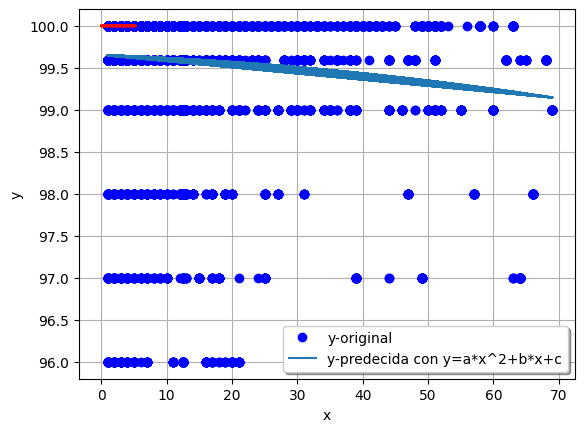

In [21]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x2, y2, 'bo', label="y-original")
plt.plot(x2, y_pred3, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)


#Gráficar la regresión Lineal 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

model.fit(X=var_indep, y=var_dep)

model.__dict__

#Predecimos los valores de total de accidentes a partir de la variable 
y_pred_lineal = model.predict(X=df[['reviews_per_month']])
y_pred_lineal

# Línea del modelo lineal (valores predichos)
plt.plot(var_indep, y_pred_lineal, color='red', label='Regresión lineal', linewidth=2)

# Mostrar la gráfica
plt.show()

In [22]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo3 = r2_score(y2, y_pred3) 
print(R2_Modelo3)

#Calculamos el coeficiente de correlación del modelo
R3= np.sqrt(R2_Modelo3)
print(R3)

0.015026441012723102
0.12258238459388486


**Modelo 2 Logaritmica**

In [23]:
def func4(x, a, b):
    return a*np.log(x) + b

In [24]:
#Ajsutamos los parametros de la cunción curve_fit
parametros4, covs = curve_fit(func4, df['host_total_listings_count'], df['host_acceptance_rate'])
print(parametros4)

# Predicciones
y_pred4 = func4(x2, *parametros4)


[-7.20036123e-02  9.97220176e+01]


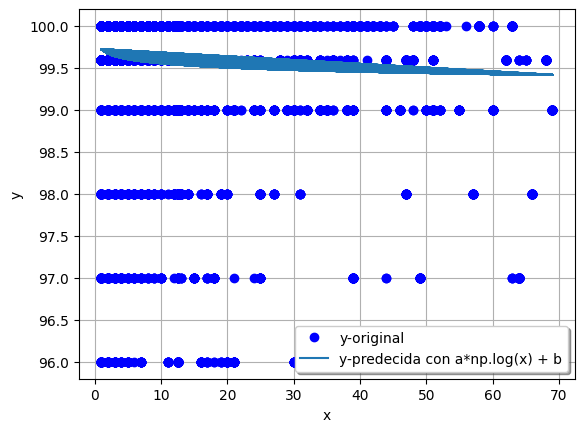

In [25]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x2, y2, 'bo', label="y-original")
plt.plot(x2, y_pred4, label="y-predecida con a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [26]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo4 = r2_score(y2, y_pred4) 
print(R2_Modelo4)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo4)
print(R)

0.013498400335496652
0.1161826163223081


### host_total_listings_count

**Modelo 1 Cuadrática**

In [27]:
#Declaramos las variables dependientes e independietes para la regresión NO lineal
var_indep3=df[['host_listings_count']]
var_dep3=df['host_total_listings_count']

#Redefinicmos las variables
x3= var_indep3
y3= var_dep3


#Generamos una función para el modelo mátematico 
def func5 (x, a,b,c):
    return a*x**2 + b*x +c


#Ajsutamos los parametros de la cunción curve_fit
parametros5, covs = curve_fit(func5, df['host_listings_count'], df['host_total_listings_count'])
print(parametros5)

#Predicciones
y_pred5 = func5(x3, *parametros5)


[-0.01368516  1.57287042 -0.72262386]


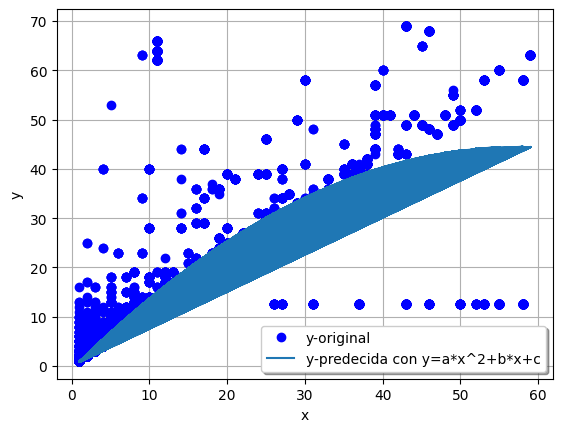

In [28]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x3, y3, 'bo', label="y-original")
plt.plot(x3, y_pred5, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [29]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo5 = r2_score(y3, y_pred5) 
print(R2_Modelo5)

#Calculamos el coeficiente de correlación del modelo
R5= np.sqrt(R2_Modelo5)
print(R5)

0.7310727862386099
0.855027944712107


**Modelo 2 Función cuadrática inversa**

In [30]:
def func6(x, a):
    return  1/a*x**2

In [31]:
#Ajsutamos los parametros de la cunción curve_fit
parametros6, covs = curve_fit(func6, df['host_total_listings_count'], df['host_acceptance_rate'])
print(parametros6)

# Predicciones
y_pred6 = func6(x3, *parametros6)

[22.40545149]


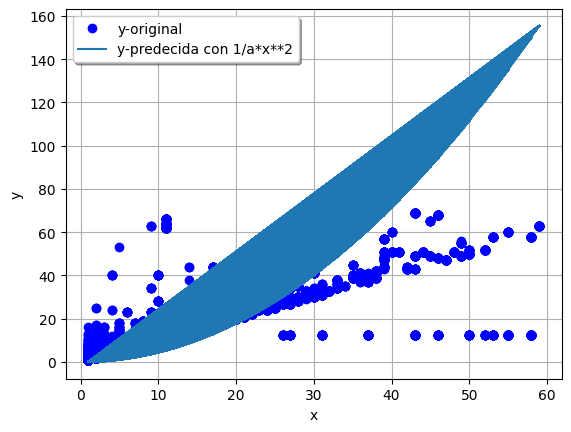

In [32]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x3, y3, 'bo', label="y-original")
plt.plot(x3, y_pred6, label="y-predecida con 1/a*x**2")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [33]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo6 = r2_score(y3, y_pred6) 
print(R2_Modelo6)

#Calculamos el coeficiente de correlación del modelo
R6= np.sqrt(R2_Modelo6)
print(R6)

-0.8223155379462925
nan


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13784\387837974.py:6: RuntimeWarning: invalid value encountered in sqrt
  R6= np.sqrt(R2_Modelo6)


### accommodates 

**Modelo 1 Cuadrática**

In [34]:
#Declaramos las variables dependientes e independietes para la regresión NO lineal
var_indep4=df[['bedrooms']]
var_dep4=df['accommodates']

#Redefinicmos las variables
x4= var_indep4
y4= var_dep4

#Generamos una función para el modelo mátematico 
def func7 (x, a, b, c):
    return  a*x**2 + b*x +c

#Ajsutamos los parametros de la cunción curve_fit
parametros7, covs = curve_fit(func7, df['bedrooms'], df['accommodates'])
print(parametros7)

#Predicciones
y_pred7 = func7(x4, *parametros7)

[-0.50438977  3.26038943  0.02910666]


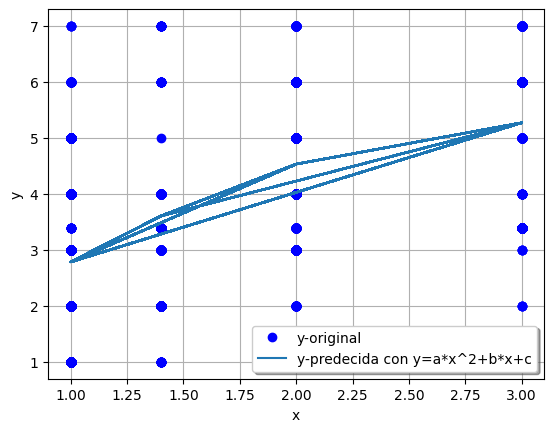

In [35]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x4, y4, 'bo', label="y-original")
plt.plot(x4, y_pred7, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [36]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo7 = r2_score(y4, y_pred7) 
print(R2_Modelo7)

#Calculamos el coeficiente de correlación del modelo
R7= np.sqrt(R2_Modelo7)
print(R7)

0.4129921814566926
0.6426446774514611


**Modelo 2 Logaritmica**

In [37]:
def func8(x, a, b):
    return a*np.log(x) + b

#Ajsutamos los parametros de la cunción curve_fit
parametros8, covs = curve_fit(func8, df['bedrooms'], df['accommodates'])
print(parametros8)

# Predicciones
y_pred8 = func8(x4, *parametros8)

[2.41044092 2.79692331]


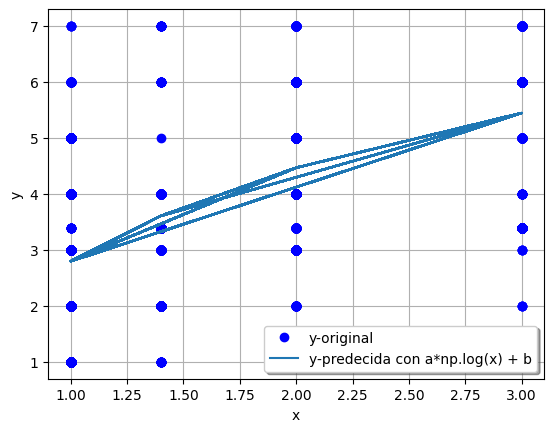

In [38]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x4, y4, 'bo', label="y-original")
plt.plot(x4, y_pred8, label="y-predecida con a*np.log(x) + b")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [39]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo8 = r2_score(y4, y_pred8) 
print(R2_Modelo8)

#Calculamos el coeficiente de correlación del modelo
R8= np.sqrt(R2_Modelo8)
print(R8)

0.4077372995234336
0.6385431070205313


### reviews_per_month

**Modelo 1 Cuadrática**

In [40]:
#Declaramos las variables dependientes e independietes para la regresión NO lineal
var_indep5=df[['number_of_reviews_ltm']]
var_dep5=df['reviews_per_month']

#Redefinicmos las variables
x5= var_indep5
y5= var_dep5

#Generamos una función para el modelo mátematico 
def func9 (x, a, b, c):
    return  a*x**2 + b*x +c

#Ajsutamos los parametros de la cunción curve_fit
parametros9, covs = curve_fit(func9, df['number_of_reviews_ltm'], df['reviews_per_month'])
print(parametros9)

#Predicciones
y_pred9 = func9(x5, *parametros9)

[-0.00168128  0.14064635  0.25495143]


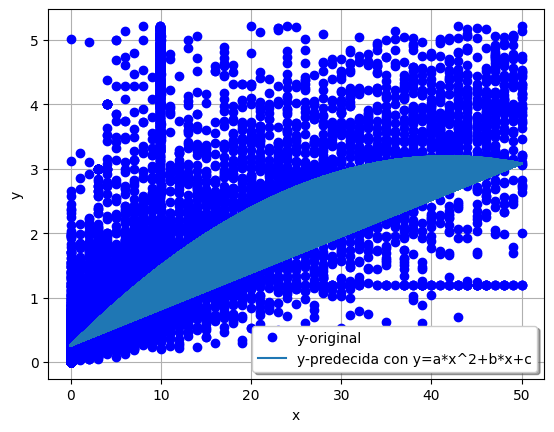

In [41]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x5, y5, 'bo', label="y-original")
plt.plot(x5, y_pred9, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [42]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo9 = r2_score(y5, y_pred9) 
print(R2_Modelo9)

#Calculamos el coeficiente de correlación del modelo
R9= np.sqrt(R2_Modelo9)
print(R9)

0.5850811580475925
0.7649059798743847


**Modelo 2 Función cociente entre polinomios**

In [43]:
def func10(x, a,b,c):
    return (a*x**2 + b)/ c*x

In [44]:
#Ajsutamos los parametros de la cunción curve_fit
parametros10, covs = curve_fit(func10, df['number_of_reviews_ltm'], df['reviews_per_month'])
print(parametros10)

# Predicciones
y_pred10 = func10(x5, *parametros10)

[-1.00202724e-02  4.23470310e+01  3.14982177e+02]


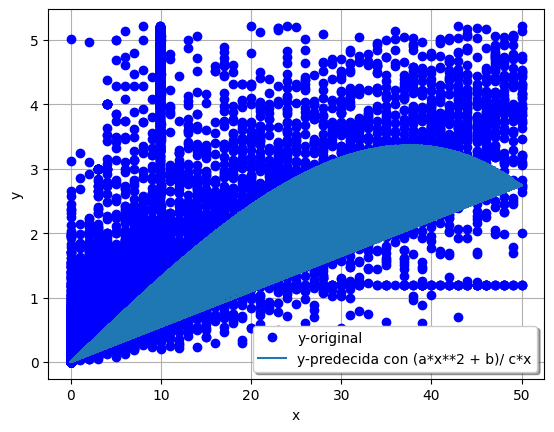

In [45]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x5, y5, 'bo', label="y-original")
plt.plot(x5, y_pred10, label="y-predecida con (a*x**2 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [46]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo10 = r2_score(y5, y_pred10) 
print(R2_Modelo10)

#Calculamos el coeficiente de correlación del modelo
R10= np.sqrt(R2_Modelo10)
print(R10)

0.5421905266413183
0.7363358789583176


### price

**Modelo 1 Cuadrática**

In [47]:
#Declaramos las variables dependientes e independietes para la regresión NO lineal
var_indep6=df[['accommodates']]
var_dep6=df['price']

#Redefinicmos las variables
x6= var_indep6
y6= var_dep6

#Generamos una función para el modelo mátematico 
def func11 (x, a, b, c):
    return  a*x**2 + b*x +c

#Ajsutamos los parametros de la cunción curve_fit
parametros11, covs = curve_fit(func11, df['accommodates'], df['price'])
print(parametros11)

#Predicciones
y_pred11 = func11(x6, *parametros11)

[-0.32465453  8.76187671 47.66713141]


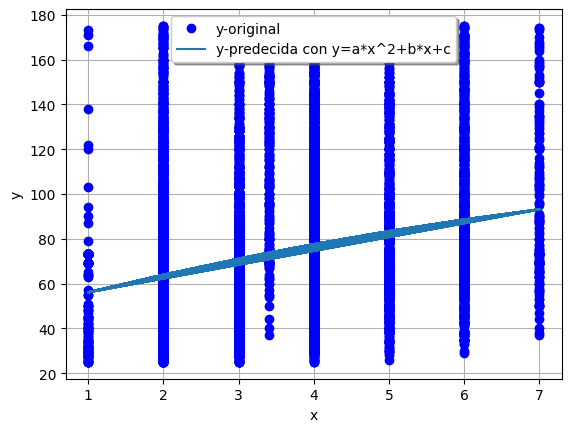

In [48]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x6, y6, 'bo', label="y-original")
plt.plot(x6, y_pred11, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [49]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo11 = r2_score(y6, y_pred11) 
print(R2_Modelo11)

#Calculamos el coeficiente de correlación del modelo
R11= np.sqrt(R2_Modelo11)
print(R11)

0.0760703334675995
0.27580850869325896


**Modelo 2 Función Valor absoluto**

In [50]:
def func12(x, a,b, c):
    return a*np.abs(x) + b*x + c

In [51]:
#Ajsutamos los parametros de la cunción curve_fit
parametros12, covs = curve_fit(func12, df['accommodates'], df['price'])
print(parametros12)

# Predicciones
y_pred12 = func12(x6, *parametros12)


[104.98139575 -98.67365751  51.67235897]


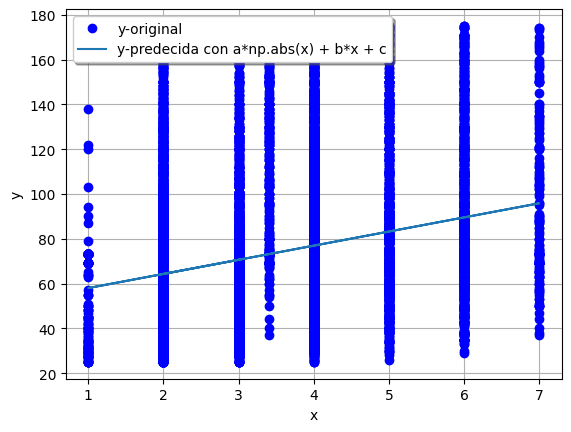

In [52]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x6, y6, 'bo', label="y-original")
plt.plot(x6, y_pred12, label="y-predecida con a*np.abs(x) + b*x + c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [53]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo12 = r2_score(y6, y_pred12) 
print(R2_Modelo12)

#Calculamos el coeficiente de correlación del modelo
R12= np.sqrt(R2_Modelo12)
print(R12)

0.07560458517644442
0.2749628796336779
